# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# Global Variable Declaration/Misc

In [3]:
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 

# Load Data

In [4]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz') # GROSS & NAMES
df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz') # GENRES & NAMES
df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz') # T constant #n constant #rating
df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz') # director/actor names, # n constant, # t constant
df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz') # Director n constant, t constant 
df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
df_tmdb = pd.read_csv('data/tmdb.movies.csv.gz') # POPULAITY, NAMES
df_rt_info = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t') # Director names

# Visualize/Explore Data

### <span style='color:red'>------BUDGETS</span>

In [5]:
print(df_budgets.shape, '\n')
print(df_budgets.info())
df_budgets.head()

(5782, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### <span style='color:red'>------IMDB_BASICS</span>

In [6]:
print(df_imdb_basics.shape, '\n')
print(df_imdb_basics.info())
df_imdb_basics.head()

(146144, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### <span style='color:red'>------IMDB_RATING</span>

In [7]:
print(df_imdb_ratings.shape, '\n')
print(df_imdb_ratings.info())
df_imdb_ratings.head()

(73856, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### <span style='color:red'>------IMDB_NAME</span>

In [8]:
print(df_imdb_name.shape, '\n')
print(df_imdb_name.info())
df_imdb_name.head()

(606648, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### <span style='color:red'>------IMDB_CREW</span>

In [9]:
print(df_imdb_crew.shape, '\n')
print(df_imdb_crew.info())
df_imdb_crew.head()

(146144, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### <span style='color:red'>------IMDB_PRINCIPALS</span>

In [10]:
print(df_imdb_principals.shape, '\n')
print(df_imdb_principals.info())
df_imdb_principals.head()

(1028186, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


### <span style='color:red'>------TMDB</span>

In [11]:
print(df_tmdb.shape, '\n')
print(df_tmdb.info())
df_tmdb.head()

(26517, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### <span style='color:red'>------RT_INFO</span>

In [12]:
print(df_rt_info.shape, '\n')
print(df_rt_info.info())
df_rt_info.head()

(1560, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Clean Data
(Parsing the names of movies to be joined later)

    -df_budgets
    -df_imdb_basics
    -df_tmdb

### <span style='color:red'>------BUDGETS</span>

In [13]:
df_budgets['title_CLEANED'] = df_budgets['movie'].apply(lambda x: x.lower())
df_budgets['title_CLEANED'] = df_budgets['title_CLEANED'].apply(lambda x: re.sub('[@_!#$%^&*().<>?/\|}{~:]', '', x))

### <span style='color:red'>------IMDB_BASICS</span>

In [14]:
df_imdb_basics['title_CLEANED'] = df_imdb_basics['original_title'].apply(lambda x: x.lower() if type(x) == str else '')
df_imdb_basics['title_CLEANED'] = df_imdb_basics['title_CLEANED'].apply(lambda x: re.sub('[@_!#$%^&*().<>?/\|}{~:]', '', x))

### <span style='color:red'>------TMDB</span>

In [15]:
df_tmdb['title_CLEANED'] = df_tmdb['original_title'].apply(lambda x: x.lower() if type(x) == str else '')
df_tmdb['title_CLEANED'] = df_tmdb['title_CLEANED'].apply(lambda x: re.sub('[@_!#$%^&*().<>?/\|}{~:]', '', x))

# Merge Data
(Merging the data by the title of the movie)

In [16]:
df_budgets_tmdb = pd.merge(df_budgets, df_tmdb,  on="title_CLEANED")
print(df_budgets_tmdb.shape, '\n')
print(df_budgets_tmdb.info())
df_budgets_tmdb.head()

(2403, 17) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2403 entries, 0 to 2402
Data columns (total 17 columns):
id_x                 2403 non-null int64
release_date_x       2403 non-null object
movie                2403 non-null object
production_budget    2403 non-null object
domestic_gross       2403 non-null object
worldwide_gross      2403 non-null object
title_CLEANED        2403 non-null object
Unnamed: 0           2403 non-null int64
genre_ids            2403 non-null object
id_y                 2403 non-null int64
original_language    2403 non-null object
original_title       2403 non-null object
popularity           2403 non-null float64
release_date_y       2403 non-null object
title                2403 non-null object
vote_average         2403 non-null float64
vote_count           2403 non-null int64
dtypes: float64(2), int64(4), object(11)
memory usage: 337.9+ KB
None


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,title_CLEANED,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",avatar,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean on stranger tides,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers age of ultron,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",avengers infinity war,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",justice league,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


(Merging the data by T constant values)

In [17]:
df_basics_ratings_crew_principals = pd.merge(df_imdb_basics, df_imdb_ratings,  on="tconst")
df_basics_ratings_crew_principals = pd.merge(df_basics_ratings_crew_principals, df_imdb_crew,  on="tconst")
df_basics_ratings_crew_principals = pd.merge(df_basics_ratings_crew_principals, df_imdb_principals,  on="tconst")
print(df_basics_ratings_crew_principals.shape, '\n')
print(df_basics_ratings_crew_principals.info())
df_basics_ratings_crew_principals.head()

(629755, 16) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629755 entries, 0 to 629754
Data columns (total 16 columns):
tconst             629755 non-null object
primary_title      629755 non-null object
original_title     629755 non-null object
start_year         629755 non-null int64
runtime_minutes    567802 non-null float64
genres             624615 non-null object
title_CLEANED      629755 non-null object
averagerating      629755 non-null float64
numvotes           629755 non-null int64
directors          626240 non-null object
writers            558935 non-null object
ordering           629755 non-null int64
nconst             629755 non-null object
category           629755 non-null object
job                124945 non-null object
characters         248129 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 81.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]"


In [18]:
df_final = pd.merge(df_basics_ratings_crew_principals, df_budgets,  on="title_CLEANED")
df_final = pd.merge(df_final, df_imdb_name,  on="nconst")
print(df_final.shape, '\n')
print(df_final.info())
df_final.head()

(26024, 27) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26024 entries, 0 to 26023
Data columns (total 27 columns):
tconst                26024 non-null object
primary_title         26024 non-null object
original_title        26024 non-null object
start_year            26024 non-null int64
runtime_minutes       25127 non-null float64
genres                25974 non-null object
title_CLEANED         26024 non-null object
averagerating         26024 non-null float64
numvotes              26024 non-null int64
directors             25977 non-null object
writers               25104 non-null object
ordering              26024 non-null int64
nconst                26024 non-null object
category              26024 non-null object
job                   8726 non-null object
characters            10534 non-null object
id                    26024 non-null int64
release_date          26024 non-null object
movie                 26024 non-null object
production_budget     26024 non-null object


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,...,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Robert Engelman,NaN,NaN,"producer,assistant_director,production_manager","tt0132347,tt0110475,tt0113855,tt0120611"
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Hilary Duff,1987.0,NaN,"actress,soundtrack,music_department","tt0356470,tt0361696,tt0380623,tt0306841"
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Haylie Duff,1985.0,NaN,"actress,producer,soundtrack","tt0433412,tt0146402,tt0115083,tt0374900"
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Charlie Sheen,1965.0,NaN,"actor,producer,soundtrack","tt0369179,tt0107144,tt0108333,tt0094291"
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Eva Longoria,1975.0,NaN,"actress,producer,director","tt0410975,tt2294677,tt0443632,tt0433387"


# Deliverables
    (Presentation Software/Resource)
    -RISE (Jupyter plug in)
    -Reveal.js.slides (Jupyter notebook download option)
    -Canva
    -Power point
    -Google Slides
    
    (DOs and DON'Ts)
    -DO: Short text. (To keep the viewer attention)
    -DON'T: Small sentences
    -DO: Bonues Slides
    -DON'T
    -DO: Graphics
    -DON'T: Text
    -DON'T: Use feature names in presentation.
    -DO: Readme(Let them read the most important thing)

In [21]:
df_final['genres_CLEANED']  = df_final['genres']
df_final['genres_CLEANED'].dropna(inplace=True)
df_final['genres_CLEANED'] = df_final['genres_CLEANED'].apply(lambda x: x.split(','))
genres = {}
for index, value in df_final['genres_CLEANED'].items():
    if(type(value)) == list:
        for _ in value:
            if _ not in genres:
                genres[_] = True

In [22]:
genres

{'Action': True,
 'Animation': True,
 'Comedy': True,
 'Romance': True,
 'Drama': True,
 'Thriller': True,
 'Western': True,
 'Crime': True,
 'Mystery': True,
 'Sci-Fi': True,
 'Fantasy': True,
 'Horror': True,
 'Adventure': True,
 'Music': True,
 'Biography': True,
 'Sport': True,
 'Family': True,
 'War': True,
 'History': True,
 'Musical': True,
 'Documentary': True,
 'News': True}

In [24]:
df_final.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,...,movie,production_budget,domestic_gross,worldwide_gross,primary_name,birth_year,death_year,primary_profession,known_for_titles,genres_CLEANED
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,Foodfight!,"$45,000,000",$0,"$73,706",Robert Engelman,NaN,NaN,"producer,assistant_director,production_manager","tt0132347,tt0110475,tt0113855,tt0120611","[Action, Animation, Comedy]"
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,Foodfight!,"$45,000,000",$0,"$73,706",Hilary Duff,1987.0,NaN,"actress,soundtrack,music_department","tt0356470,tt0361696,tt0380623,tt0306841","[Action, Animation, Comedy]"
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,Foodfight!,"$45,000,000",$0,"$73,706",Haylie Duff,1985.0,NaN,"actress,producer,soundtrack","tt0433412,tt0146402,tt0115083,tt0374900","[Action, Animation, Comedy]"
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,Foodfight!,"$45,000,000",$0,"$73,706",Charlie Sheen,1965.0,NaN,"actor,producer,soundtrack","tt0369179,tt0107144,tt0108333,tt0094291","[Action, Animation, Comedy]"
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,Foodfight!,"$45,000,000",$0,"$73,706",Eva Longoria,1975.0,NaN,"actress,producer,director","tt0410975,tt2294677,tt0443632,tt0433387","[Action, Animation, Comedy]"


In [33]:
list(genres.keys())

['Action',
 'Animation',
 'Comedy',
 'Romance',
 'Drama',
 'Thriller',
 'Western',
 'Crime',
 'Mystery',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'Adventure',
 'Music',
 'Biography',
 'Sport',
 'Family',
 'War',
 'History',
 'Musical',
 'Documentary',
 'News']

In [37]:
# Adding columns for every genre
for genre in list(genres.keys()):
    df_final[genre] = False

In [74]:
df_final = df_final.dropna(subset = ['genres_CLEANED'])

In [75]:
df_final.isna().sum()

tconst                    0
primary_title             0
original_title            0
start_year                0
runtime_minutes         869
genres                    0
title_CLEANED             0
averagerating             0
numvotes                  0
directors                45
writers                 898
ordering                  0
nconst                    0
category                  0
job                   17252
characters            15473
id                        0
release_date              0
movie                     0
production_budget         0
domestic_gross            0
worldwide_gross           0
primary_name              0
birth_year            12345
death_year            25438
primary_profession      280
known_for_titles         80
genres_CLEANED            0
Action                    0
Animation                 0
Comedy                    0
Romance                   0
Drama                     0
Thriller                  0
Western                   0
Crime               

In [76]:
for genre in list(genres.keys()):
    df_final[genre] = df_final['genres_CLEANED'].apply(lambda x: True if genre in x else False)

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
df_final[['genres_CLEANED', 'Action', 'Animation', 'Comedy', 'Romance', 'Thriller']].head(10)

,genres_CLEANED,Action,Animation,Comedy,Romance,Thriller
0,"[Action, Animation, Comedy]",True,True,True,False,False
1,"[Action, Animation, Comedy]",True,True,True,False,False
2,"[Action, Animation, Comedy]",True,True,True,False,False
3,"[Action, Animation, Comedy]",True,True,True,False,False
4,"[Action, Animation, Comedy]",True,True,True,False,False
5,[Comedy],False,False,True,False,False
6,"[Comedy, Romance]",False,False,True,True,False
7,"[Drama, Thriller, Western]",False,False,False,False,True
8,"[Action, Crime, Thriller]",True,False,False,False,True
9,"[Action, Animation, Comedy]",True,True,True,False,False


In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 0 to 26023
Data columns (total 50 columns):
tconst                25974 non-null object
primary_title         25974 non-null object
original_title        25974 non-null object
start_year            25974 non-null int64
runtime_minutes       25105 non-null float64
genres                25974 non-null object
title_CLEANED         25974 non-null object
averagerating         25974 non-null float64
numvotes              25974 non-null int64
directors             25929 non-null object
writers               25076 non-null object
ordering              25974 non-null int64
nconst                25974 non-null object
category              25974 non-null object
job                   8722 non-null object
characters            10501 non-null object
id                    25974 non-null int64
release_date          25974 non-null object
movie                 25974 non-null object
production_budget     25974 non-null object
domestic_gross

In [80]:
df_final.sample(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,...,Adventure,Music,Biography,Sport,Family,War,History,Musical,Documentary,News
15018,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",minions,6.4,193917,"nm1853544,nm0049633",...,True,False,False,False,False,False,False,False,False,False
6681,tt1469304,Baywatch,Baywatch,2017,116.0,"Action,Comedy,Crime",baywatch,5.6,137528,nm1164861,...,False,False,False,False,False,False,False,False,False,False
23302,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",incredibles 2,7.7,203510,nm0083348,...,True,False,False,False,False,False,False,False,False,False
14517,tt1653203,Jesse,Jesse,2011,120.0,"Action,Crime,Drama",jesse,4.9,96,nm0139337,...,False,False,False,False,False,False,False,False,False,False
6436,tt1586713,Burlesque,Burlesque,2010,NaN,Drama,burlesque,7.0,45,nm3313266,...,False,False,False,False,False,False,False,False,False,False
12458,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",paranormal activity 3,5.8,85689,"nm1413364,nm1160962",...,False,False,False,False,False,False,False,False,False,False
23076,tt3518372,Earth,Earth,2015,60.0,Sci-Fi,earth,3.6,16,nm6274253,...,False,False,False,False,False,False,False,False,False,False
7844,tt1855325,Resident Evil: Retribution,Resident Evil: Retribution,2012,95.0,"Action,Horror,Sci-Fi",resident evil retribution,5.4,125191,nm0027271,...,False,False,False,False,False,False,False,False,False,False
3770,tt7137846,Breaking In,Breaking In,2018,88.0,"Action,Crime,Drama",breaking in,5.4,10154,nm0574625,...,False,False,False,False,False,False,False,False,False,False
909,tt4034354,Swiss Army Man,Swiss Army Man,2016,97.0,"Adventure,Comedy,Drama",swiss army man,7.0,91736,"nm3453283,nm3215397",...,True,False,False,False,False,False,False,False,False,False


In [86]:
df_final.loc[:,['production_budget','domestic_gross','worldwide_gross']].sample(10)

,production_budget,domestic_gross,worldwide_gross
22643,"$1,300,000","$4,055","$1,738,663"
12199,"$40,000,000","$54,445,357","$105,945,357"
9870,"$70,000,000","$30,157,016","$69,157,016"
8510,"$85,000,000","$64,935,167","$173,613,482"
18245,"$150,000,000","$45,157,105","$334,486,852"
12186,"$8,000,000","$163,753","$2,772,511"
18980,"$50,000,000","$66,711,892","$117,211,892"
5640,"$16,000,000",$0,"$1,844,228"
25775,"$110,000,000","$113,330,342","$215,300,000"
23175,"$200,000","$6,260","$6,260"


In [99]:
money = ['production_budget','domestic_gross','worldwide_gross']
for item in money:
    df_final[f"{item}_CLEANED"] = df_final[item].apply(lambda x: float(x.replace('$','').replace(',','_')))

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df_final['profit_margin'] = df_final.worldwide_gross_CLEANED*100/df_final.production_budget_CLEANED
df_final[['production_budget','domestic_gross','worldwide_gross','profit_margin']].sample(10)

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,production_budget,domestic_gross,worldwide_gross,profit_margin
12376,"$125,000,000","$186,848,418","$535,663,443",428.530754
11251,"$2,000,000","$18,344,729","$18,344,729",917.236450
6894,"$90,000,000","$102,515,793","$239,373,970",265.971078
15276,"$2,000,000",$0,"$2,151,887",107.594350
17445,"$13,000,000","$8,178,001","$121,778,347",936.756515
17700,"$2,000,000","$1,577,287","$2,419,669",120.983450
21088,"$9,000,000","$52,597,610","$83,051,676",922.796400
18803,"$33,000,000","$46,009,673","$75,898,100",229.994242
22075,"$22,500,000","$4,200,117","$31,054,727",138.021009
6917,"$26,000,000","$49,875,291","$81,275,291",312.597273


In [126]:
df_final.loc[df_final["Action"] == True]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_CLEANED,averagerating,numvotes,directors,...,Family,War,History,Musical,Documentary,News,profit_margin,production_budget_CLEANED,domestic_gross_CLEANED,worldwide_gross_CLEANED
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,False,False,False,False,False,False,0.163791,45000000.0,0.0,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,False,False,False,False,False,False,0.163791,45000000.0,0.0,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,False,False,False,False,False,False,0.163791,45000000.0,0.0,73706.0
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,False,False,False,False,False,False,0.163791,45000000.0,0.0,73706.0
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",foodfight,1.9,8248,nm0440415,...,False,False,False,False,False,False,0.163791,45000000.0,0.0,73706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",teefa in trouble,7.4,2724,nm6773153,...,False,False,False,False,False,False,6.587067,1500000.0,0.0,98806.0
25938,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",teefa in trouble,7.4,2724,nm6773153,...,False,False,False,False,False,False,6.587067,1500000.0,0.0,98806.0
25939,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",teefa in trouble,7.4,2724,nm6773153,...,False,False,False,False,False,False,6.587067,1500000.0,0.0,98806.0
25940,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",teefa in trouble,7.4,2724,nm6773153,...,False,False,False,False,False,False,6.587067,1500000.0,0.0,98806.0


In [125]:
df_final.loc[df_final["Action"] == True].groupby("Action").mean()

,start_year,runtime_minutes,averagerating,numvotes,ordering,id,birth_year,death_year,Animation,Comedy,...,Family,War,History,Musical,Documentary,News,profit_margin,production_budget_CLEANED,domestic_gross_CLEANED,worldwide_gross_CLEANED
Action,,,,,,,,,,,,,,,,,,,,,
True,2014.044827,110.754701,6.108511,140043.132045,5.420335,50.363814,1966.833031,1992.357542,0.037356,0.177359,...,0.01949,0.007796,0.010882,0.0,0.006659,0.0,335.936835,6.542025e+07,7.033721e+07,1.898761e+08


In [123]:
pd.concat([df_final.loc[df_final["Action"] == True].groupby("Action").profit_margin.mean(),(df_final.loc[df_final["Animation"] == True].groupby("Animation").profit_margin.mean())])

True    335.936835
True    414.793608
Name: profit_margin, dtype: float64

In [149]:
unique_genres = list(genres.keys())

for count, genre in enumerate(unique_genres):
    x = df_final.loc[df_final[f"{genre}"] == True].groupby(f"{genre}").profit_margin.mean()
    x.index = [unique_genres[count]]
    if count > 0:
        y = df_final.loc[df_final[unique_genres[count-1]] == True].groupby(unique_genres[count-1]).profit_margin.mean()
        y.index = [unique_genres[count-1]]
        combo = pd.concat([combo, y])

In [150]:
combo

News           153.975796
Documentary    377.542285
Name: profit_margin, dtype: float64

In [152]:
print(df_final.groupby(_).sum()[['profit_margin']])

       profit_margin
Drama               
False   6.021901e+06
True    4.837052e+06


In [156]:
profit_margins = []
for genre in unique_genres:
    profit_margins.append(df_final.groupby(genre).mean()['profit_margin'][1])

In [173]:
pf_dict = dict(zip(unique_genres, profit_margins))
pf_dict

{'Action': 335.936835028575,
 'Animation': 414.7936075654013,
 'Comedy': 354.8172848326081,
 'Romance': 397.27097372554454,
 'Drama': 368.7339804452555,
 'Thriller': 587.972700484635,
 'Western': 121.54909646339661,
 'Crime': 230.16882437468828,
 'Mystery': 776.0593049829189,
 'Sci-Fi': 303.2017814495809,
 'Fantasy': 422.06551508963724,
 'Horror': 913.7171733851573,
 'Adventure': 312.9679877109322,
 'Music': 328.7618969452663,
 'Biography': 411.34715418806127,
 'Sport': 368.1059352242902,
 'Family': 446.32472800094325,
 'War': 164.26437342130504,
 'History': 352.65006823760234,
 'Musical': 323.5896826096663,
 'Documentary': 377.5422852602764,
 'News': 153.97579607206018}

In [188]:
pf_df = pd.DataFrame.from_dict(pf_dict, orient = 'index', columns = ['profit_margin'])
pf_df = pf_df.reset_index().rename(columns = {'index':'genre'})

In [203]:
pf_df_sorted = pf_df.sort_values(by='profit_margin', ascending = False)

Text(0.5, 1.0, 'Movie Genres with The Largest Profit Margins')

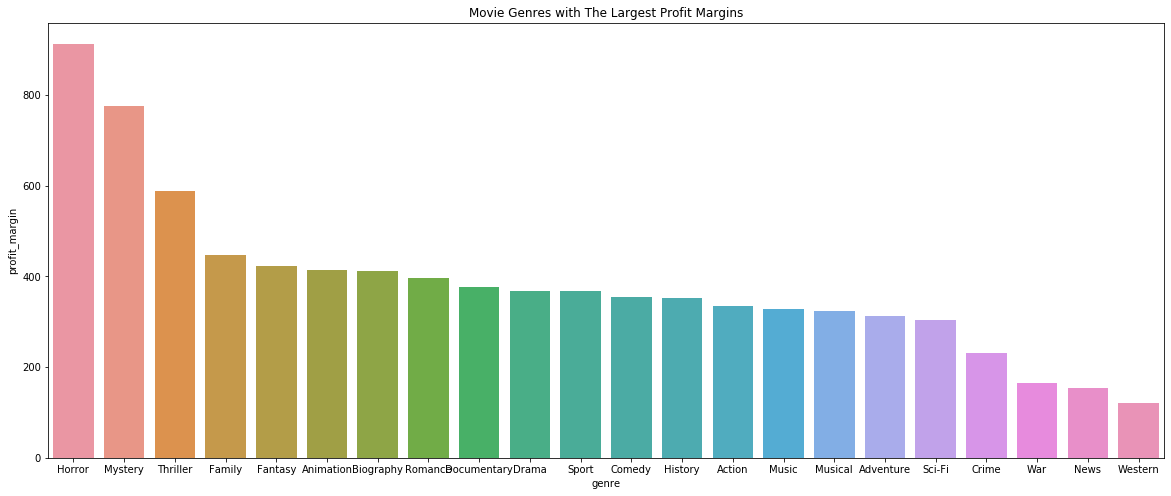

In [207]:
plt.figure(figsize=(20,8))
sns.barplot(x='genre', y='profit_margin', data=pf_df_sorted).set_title('Movie Genres with The Largest Profit Margins')